In [1]:
%matplotlib inline


import json
import gzip

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

## Reading All Tweets by @realdonaldtrump

The first thing we do is read in tweets by @realdonaldtrump from a compressed files. 

In [2]:
with gzip.open('data/realdonaldtrump_22893.gz', 'rb') as f:
    df = pd.DataFrame(json.loads(line) for line in f)


df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,geo,id,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,scopes,screen_name,source,text,truncated,user_id
0,None,None,Mon May 04 18:54:25 +0000 2009,"[0, 117]","{'user_mentions': [], 'hashtags': [], 'urls': ...",NaN,359,False,None,1698308935,...,NaN,412,False,NaN,NaN,realDonaldTrump,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Be sure to tune in and watch Donald Trump on L...,False,25073877
1,None,None,Tue May 05 01:00:10 +0000 2009,"[0, 131]","{'user_mentions': [], 'hashtags': [], 'urls': ...",NaN,6,False,None,1701461182,...,NaN,4,False,NaN,NaN,realDonaldTrump,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Donald Trump will be appearing on The View tom...,False,25073877
2,None,None,Fri May 08 13:38:08 +0000 2009,"[0, 116]","{'symbols': [], 'urls': [], 'hashtags': [], 'u...",NaN,5,False,None,1737479987,...,NaN,6,False,NaN,NaN,realDonaldTrump,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Donald Trump reads Top Ten Financial Tips on L...,False,25073877
3,None,None,Fri May 08 20:40:15 +0000 2009,"[0, 103]","{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,29,False,None,1741160716,...,NaN,9,False,NaN,NaN,realDonaldTrump,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",New Blog Post: Celebrity Apprentice Finale and...,False,25073877
4,None,None,Tue May 12 14:07:28 +0000 2009,"[0, 109]","{'symbols': [], 'urls': [], 'user_mentions': [...",NaN,1985,False,None,1773561338,...,NaN,1492,False,NaN,NaN,realDonaldTrump,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","""My persona will never be that of a wallflower...",False,25073877


In [3]:
df.shape

(22893, 32)

In [4]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited', 'geo',
       'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'scopes', 'screen_name', 'source', 'text',
       'truncated', 'user_id'],
      dtype='object')

<hr>
## Simple Frequency Analysis

In this section, we will cover a few simple analysis techniques to garner some small insights rapidly.

- Frequency Graph
- Top users
- Top hash tags
- Top URLs
- Top images
- Most retweeted tweet
- Keyword Frequency

### Twitter Timeline 


In [5]:
# Twitter's time format, for parsing the created_at date
timeFormat = "%a %b %d %H:%M:%S +0000 %Y"

# change time zone
df['created_at'] = pd.to_datetime(df['created_at'], format=timeFormat).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

# create new column: date, time and hour
df['date'] = pd.to_datetime(df['created_at'], format=timeFormat).dt.date
df['time'] = pd.to_datetime(df['created_at'], format=timeFormat).dt.time
df['hour'] = pd.to_datetime(df['created_at'], format=timeFormat).dt.hour

In [6]:
daily_df = df.groupby(['date']).size()
daily_df.head()

date
2009-05-04    2
2009-05-08    2
2009-05-12    2
2009-05-13    1
2009-05-14    1
dtype: int64

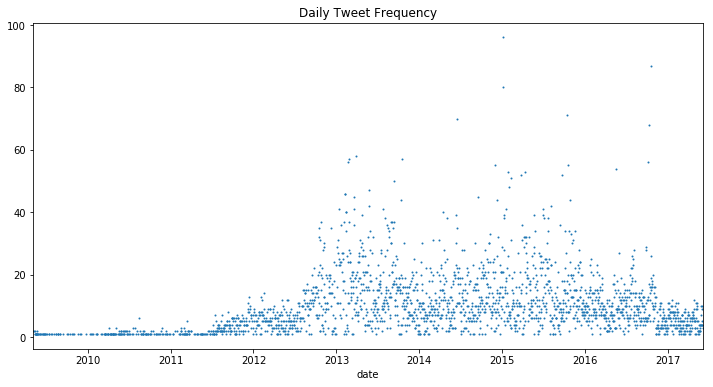

In [7]:
plt.title("Daily Tweet Frequency")
    
daily_df.plot(marker='o',markersize=1, figsize=(12, 6),linestyle='')

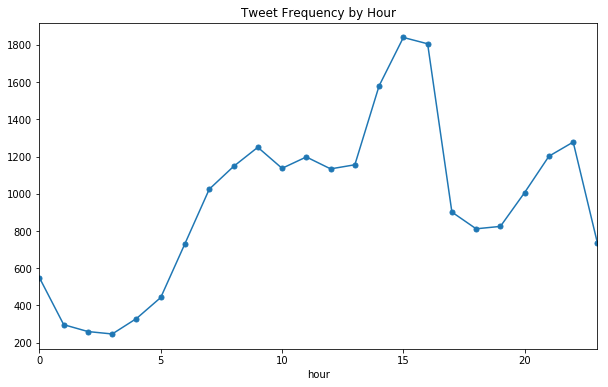

In [8]:
plt.title("Tweet Frequency by Hour")

    
df.groupby('hour')['id'].size().plot(marker='o',markersize=5, figsize=(10, 6) )

Hashtags, are high signal keywords. 
Maybe the most common hashtags will be very informative.

In [9]:
# A map for hashtag counts
hashtagCounter = {}

for index, row in df.iterrows():
    hashtagList = row["entities"]["hashtags"]
    for hashtagObj in hashtagList:
            
            # We lowercase the hashtag to avoid duplicates (e.g., #MikeBrown vs. #mikebrown)
            hashtagString = hashtagObj["text"].lower()
            
            if ( hashtagString not in hashtagCounter ):
                hashtagCounter[hashtagString] = 1
            else:
                hashtagCounter[hashtagString] += 1

print ("Unique Hashtags:", len(hashtagCounter.keys()))
sortedHashtags = sorted(hashtagCounter, key=hashtagCounter.get, reverse=True)
print ("Top Twenty Hashtags:")
for ht in sortedHashtags[:20]:
    print ("\t", "#" + ht, hashtagCounter[ht])

Unique Hashtags: 1345
Top Twenty Hashtags:
	 #trump2016 679
	 #makeamericagreatagain 419
	 #celebapprentice 181
	 #maga 137
	 #americafirst 99
	 #celebrityapprentice 94
	 #draintheswamp 93
	 #trump 79
	 #timetogettough 71
	 #imwithyou 67
	 #bigleaguetruth 67
	 #trumpvlog 58
	 #trumpforpresident 58
	 #debate 54
	 #votetrump 53
	 #crookedhillary 42
	 #trumptrain 41
	 #trumppence16 36
	 #gopdebate 32
	 #icymi 31


We can do the same with URLs to find the most shared URL.

In [10]:
# A map for hashtag counts
urlCounter = {}

for index, row in df.iterrows():
    urlList = row["entities"]["urls"]
        
    for url in urlList:
        urlStr = url["url"]

        if ( urlStr not in urlCounter ):
            urlCounter[urlStr] = 1
        else:
            urlCounter[urlStr] += 1

print ("Unique URLs:", len(urlCounter.keys()))
sortedUrls = sorted(urlCounter, key=urlCounter.get, reverse=True)
print ("Top Twenty URLs:")
for url in sortedUrls[:20]:
    print ("\t", url, urlCounter[url])

Unique URLs: 4096
Top Twenty URLs:
	 https://t.co/u25yI5T7E8 22
	 https://t.co/3KWOl2ibaW 15
	 https://t.co/3KWOl20zMm 9
	 http://t.co/jEgR6jSQ5J 7
	 https://t.co/jg50w3rcnn 7
	 https://t.co/HfihPERFgZ 7
	 http://t.co/3zYiIYWs87 6
	 https://t.co/TICkBt5xnH 6
	 https://t.co/ANvTcZqfOq 6
	 http://t.co/SV6KAS1E 5
	 http://t.co/MYiwkyfiVU 5
	 http://t.co/kWP1FV0eY9 5
	 http://t.co/W0MDqPckX4 4
	 http://t.co/qqxRaTlKpP 4
	 http://t.co/MiVcT6zjEk 4
	 https://t.co/u25yI6aIvG 4
	 http://t.co/8CK5Pcdfsf 3
	 http://t.co/XovcybFo0P 3
	 http://t.co/BVsLbZTA46 3
	 http://t.co/nT7zundGmV 3


Note how each URL is shortened using Twitter's shortener. 
To get a better idea of the content, we should expand the url.

In [11]:
print ("Top Expanded URLs:")
for url in sortedUrls[:10]:
    try:
        r = requests.get(url)
        realUrl = r.url
        print ("\t", url, urlCounter[url], "->", realUrl)
    except:
        print ("\t", url, urlCounter[url], "->", "UNKNOWN Failure")

Top Expanded URLs:
	 https://t.co/u25yI5T7E8 22 -> UNKNOWN Failure
	 https://t.co/3KWOl2ibaW 15 -> UNKNOWN Failure
	 https://t.co/3KWOl20zMm 9 -> UNKNOWN Failure
	 http://t.co/jEgR6jSQ5J 7 -> UNKNOWN Failure
	 https://t.co/jg50w3rcnn 7 -> UNKNOWN Failure
	 https://t.co/HfihPERFgZ 7 -> UNKNOWN Failure
	 http://t.co/3zYiIYWs87 6 -> UNKNOWN Failure
	 https://t.co/TICkBt5xnH 6 -> UNKNOWN Failure
	 https://t.co/ANvTcZqfOq 6 -> UNKNOWN Failure
	 http://t.co/SV6KAS1E 5 -> UNKNOWN Failure


Since URLs and Hashtags are both entities, we can do the same for other entities, like mentions and media.

In [12]:
# A map for mention counts
mentionCounter = {}

for index, row in df.iterrows():
    mentions = row["entities"]["user_mentions"]

    for mention in mentions:
        mentionStr = mention["screen_name"]

        if ( mentionStr not in mentionCounter ):
            mentionCounter[mentionStr] = 1
        else:
            mentionCounter[mentionStr] += 1

print ("Unique Mentions:", len(mentionCounter.keys()))
sortedMentions = sorted(mentionCounter, key=mentionCounter.get, reverse=True)
print ("Top Twenty Mentions:")
for mention in sortedMentions[:20]:
    print ("\t", mention, mentionCounter[mention])

Unique Mentions: 9221
Top Twenty Mentions:
	 realDonaldTrump 6276
	 BarackObama 458
	 FoxNews 333
	 foxandfriends 292
	 ApprenticeNBC 263
	 MittRomney 220
	 CNN 209
	 IvankaTrump 136
	 megynkelly 127
	 seanhannity 104
	 oreillyfactor 101
	 EricTrump 97
	 Macys 96
	 TrumpDoral 95
	 nytimes 94
	 CelebApprentice 88
	 nbc 87
	 AlexSalmond 74
	 TrumpChicago 73
	 GOP 72


In [13]:
# A map for media counts
mediaCounter = {}

for index, row in df.iterrows():
    if "media" not in row["entities"]:
        continue
    mediaList = row["entities"]["media"]

    for media in mediaList:
        mediaStr = media["media_url"]

        if mediaStr not in mediaCounter:
            mediaCounter[mediaStr] = 1
        else:
            mediaCounter[mediaStr] += 1

print ("Unique Media:", len(mediaCounter.keys()))
sortedMedia = sorted(mediaCounter, key=mediaCounter.get, reverse=True)
print ("Top Twenty Media:")
for media in sortedMedia[:20]:
    print ("\t", media, mediaCounter[media])

Unique Media: 1473
Top Twenty Media:
	 http://pbs.twimg.com/media/BBP1Lv2CEAAmTXq.jpg 2
	 http://pbs.twimg.com/media/Bjws7emCEAEpSyi.jpg 2
	 http://pbs.twimg.com/media/BqrgvEiCIAAckuw.jpg 2
	 http://pbs.twimg.com/media/Buu05qtIcAACX2w.jpg 2
	 http://pbs.twimg.com/media/CFU66zMUgAE7Zgs.jpg 2
	 http://pbs.twimg.com/media/CFfzuViUMAA9jtv.jpg 2
	 http://pbs.twimg.com/media/CGC3S_PWIAEgnZ_.jpg 2
	 http://pbs.twimg.com/media/CbxtPCnWAAEtYwW.jpg 2
	 http://pbs.twimg.com/media/Ck7jf0NWkAE5tUN.jpg 2
	 http://pbs.twimg.com/media/CvLHPb-UkAAunKr.jpg 2
	 http://pbs.twimg.com/media/AgPbIbjCAAIQbo9.jpg 1
	 http://pbs.twimg.com/media/BAwTmXpCAAECGYh.jpg 1
	 http://pbs.twimg.com/media/BHNisc8CAAE22HX.jpg 1
	 http://pbs.twimg.com/media/BI03SySCIAAJMg6.jpg 1
	 http://pbs.twimg.com/media/BKlbXBsCEAAHmsL.jpg 1
	 http://pbs.twimg.com/media/BLfWxTcCMAAW3um.jpg 1
	 http://pbs.twimg.com/media/BNV9l99CQAAIxXR.jpg 1
	 http://pbs.twimg.com/media/BNaVWtbCMAEb_jt.jpg 1
	 http://pbs.twimg.com/media/BP-kes5CQAIxM1Z.

We can see some data is relevant, both in pictures and in hashtags and URLs. 
Are the most retweeted retweets also useful? 

In [14]:
top_10_retweets = df.sort_values(by=['retweet_count'], ascending=False)[['retweet_count', 'text', 'created_at']].head(10)

top_10_retweets

,retweet_count,text,created_at
21834,340359,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 06:43:14-05:00
21846,217605,Such a beautiful and important evening! The fo...,2016-11-09 06:36:58-05:00
10236,202058,Are you allowed to impeach a president for gro...,2014-06-04 06:23:11-04:00
20021,162813,How long did it take your staff of 823 people ...,2016-06-09 16:40:32-04:00
22070,139365,"Happy New Year to all, including to my many en...",2016-12-31 08:17:21-05:00
7006,129561,"Be prepared, there is a small chance that our ...",2013-08-31 05:46:07-04:00
20394,116756,The media is spending more time doing a forens...,2016-07-20 11:36:06-04:00
2190,98635,I have never seen a thin person drinking Diet...,2012-10-14 14:43:44-04:00
22816,98558,"Great to be in Riyadh, Saudi Arabia. Looking f...",2017-05-20 05:44:31-04:00
21897,97855,Fidel Castro is dead!,2016-11-26 08:08:11-05:00


In [15]:
for index, row in top_10_retweets.iterrows():
    print(row['created_at'], row['retweet_count'],row['text'],'\n')
    

2016-11-08 06:43:14-05:00 340359 TODAY WE MAKE AMERICA GREAT AGAIN! 

2016-11-09 06:36:58-05:00 217605 Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before 

2014-06-04 06:23:11-04:00 202058 Are you allowed to impeach a president for gross incompetence? 

2016-06-09 16:40:32-04:00 162813 How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ 

2016-12-31 08:17:21-05:00 139365 Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love! 

2013-08-31 05:46:07-04:00 129561 Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War III. 

2016-07-20 11:36:06-04:00 116756 The media is spending more time doing a forensic analysis of Melania's speech than the FBI spent on Hillary's emails. 

2012-10

<hr>
<img src="data/trump.png" width="200" height="200" />

## Good job! Time for a break!

---
# Content and Sentiment Analysis

Another popular type of analysis people do on social networks is "sentiment analysis," which is used to figure out how people **feel** about a specific topic.
Some tools also provide measurements like subjectivity/objectivity of text content.



### Sentiment Analysis w/ TextBlob

TextBlob is a nice Python package that provides a number of useful text processing capabilities.
We will use it for sentiment analysis to calculate polarity and subjectivity for each relevant tweet.

You need a Python library <code>textblob</code>, which you can install by running the following command in **Command Prompt**:

```
pip install textblob
```

In [16]:
from textblob import TextBlob

def calculate_polarity(tweet):
    tweetString = tweet.lower()
    
    blob = TextBlob(tweetString)
    polarity = blob.sentiment.polarity
    return polarity

def calculate_subjectivity(tweet):
    tweetString = tweet.lower()
    
    blob = TextBlob(tweetString)
    subjectivity = blob.sentiment.subjectivity
    return subjectivity


df['polarity'] = df['text'].apply(calculate_polarity)
df['subjectivity'] = df['text'].apply(calculate_subjectivity)

In [17]:
# Most negative tweets
df.sort_values(by=['polarity'])[['text','polarity']].head()

,text,polarity
13537,"""@JayLefkowitz: @realDonaldTrump @fitsnews Agr...",-1.0
2978,Worst ever issue of @VanityFair magazine—bad f...,-1.0
8536,2013 is the worst year ever for Hollywood. Gar...,-1.0
21358,We cannot let this evil continue! #Debates2016...,-1.0
19799,How quality a woman is Rowanne Brewer Lane to ...,-1.0


In [18]:
# Most positive tweets
df.sort_values(by=['polarity'], ascending= False)[['text','polarity']].head()

,text,polarity
11446,"Attention Arnold Palmer: Happy Birthday, Arno...",1.0
5833,Shirts and ties are doing great @Macys--thanks!,1.0
18181,I am signing copies of my book CRIPPLED AMERIC...,1.0
5840,"""@Riddzey32: @BarackObama 2-Day is #CoachLomba...",1.0
18197,I am signing copies of my book CRIPPLED AMERIC...,1.0


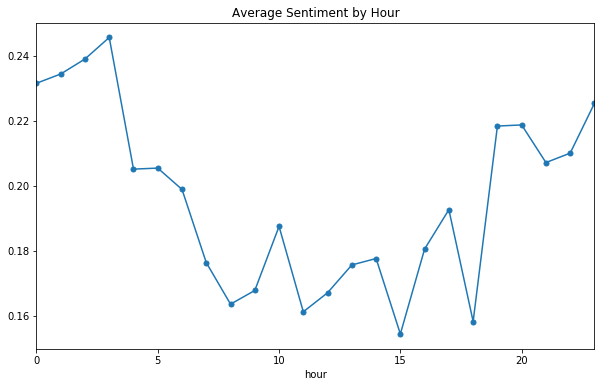

In [19]:
plt.title("Average Sentiment by Hour")
    
df.groupby('hour')['polarity'].mean().plot(marker='o',markersize=5, figsize=(10, 6) )

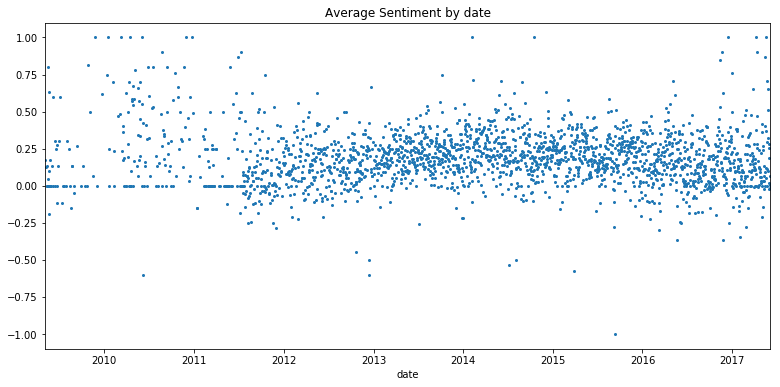

In [20]:
plt.title("Average Sentiment by date")
    
df.groupby('date')['polarity'].mean().plot(marker='o',markersize=2, figsize=(13, 6), linestyle='' )

## Sentiment Analysis with NLTK Vader

http://www.nltk.org/_modules/nltk/sentiment/vader.html

In [21]:
import nltk
nltk.download("vader_lexicon")
import nltk.sentiment.util
import nltk.sentiment.vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [23]:
def calculate_compound_sentiment(tweet):
    tweetString = tweet.lower()

    compound_sentiment = vader.polarity_scores(tweetString)["compound"]
    return compound_sentiment


df['compound_sentiment'] = df['text'].apply(calculate_compound_sentiment)

In [24]:
# Most negative tweets
df.sort_values(by=['compound_sentiment'])[['text','compound_sentiment']].head()

,text,compound_sentiment
22181,.@NBCNews is bad but Saturday Night Live is th...,-0.9690
8504,If Graydon Carter's very dumb bosses would fir...,-0.9670
8459,If Graydon Carter's very dumb bosses would fir...,-0.9670
22645,Democrat Jon Ossoff would be a disaster in Con...,-0.9655
2644,"How come every time I show anger, disgust or i...",-0.9643


In [25]:
# the most negative one
df.sort_values(by=['compound_sentiment']).iloc[0]['text']

'.@NBCNews is bad but Saturday Night Live is the worst of NBC. Not funny, cast is terrible, always a complete hit job. Really bad television!'

In [26]:
# Most positive tweets
df.sort_values(by=['compound_sentiment'], ascending= False)[['text','compound_sentiment']].head()

,text,compound_sentiment
11294,"Good luck and best wishes to my dear friend, t...",0.9857
9650,.@bubbawatson What a great player you have tu...,0.9797
22078,RT @IvankaTrump: 2016 has been one of the most...,0.9765
20763,"""@PaulaDuvall2: We're all enjoying you, as wel...",0.9735
14455,"Have a fantastic, beautiful and happy Easter e...",0.9729


In [27]:
# the most positive one
df.sort_values(by=['compound_sentiment'], ascending= False).iloc[0]['text']

'Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers!  Winner of Celebrity Apprentice, amazing woman.'

---
# Topic Modeling

Along with sentiment analysis, a question often asked of social networks is "What is @realdonaldtrump talking about?" 
We can answer this question using tools from topic modeling and natural language processing.


To generate these topic models, we will use the Gensim package's implementation of Latent Dirichlet Allocation (LDA), which basically constructs a set of topics where each topic is described as a probability distribution over the words in our tweets. 

Several other methods for topic modeling exist as well.

You need a Python library <code>gensim</code>, which you can install by running the following command in **Command Prompt**:

```
pip install gensim
```

In [28]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

# Gotta pull in a bunch of packages for this
import gensim.models.ldamulticore
import gensim.matutils
import sklearn.cluster
import sklearn.feature_extraction 
import sklearn.feature_extraction.text
import sklearn.metrics
import sklearn.preprocessing



In [29]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We first extract all relevant tweets' text for building our models.

In [30]:
# Get all tweets and conver to lowercase
allTweetText = df['text'].apply(lambda x: x.lower()).tolist()

print ("All Tweet Count:", len(allTweetText))

All Tweet Count: 22893


Now we build a list of stop words (words we don't care about) and build a feature generator (the vectorizer) that assigns integer keys to tokens and counts the number of each token.

In [31]:
enStop = stopwords.words('english')
esStop = stopwords.words('spanish')

# Skip stop words, retweet signs, @ symbols, and URL headers
stopList = enStop + esStop + ["http", "https", "rt", "@", ":", "co"]

vectorizer = sklearn.feature_extraction.text.CountVectorizer(strip_accents='unicode', 
                                                             tokenizer=None,
                                                             token_pattern='(?u)#?\\b\\w+[\'-]?\\w+\\b',
                                                             stop_words=stopList)

# Analyzer
analyze = vectorizer.build_analyzer() 

# Create a vectorizer for all our content
vectorizer.fit(allTweetText)

# Get all the words in our text
names = vectorizer.get_feature_names()

# Create a map for vectorizer IDs to words
id2WordDict = dict(zip(range(len(vectorizer.get_feature_names())), names))

We then use the vectorizer to transform our tweet text into a feature set, which essentially is a table with rows of tweets, columns for each keyword, and each cell is the number of times that keyword appears in that tweet.

We then convert that table into a model the Gensim package can handle, apply LDA, and grab the top 10 topics, 10 words that describe that topic, and print them.

In [32]:
# Create a corpus for 
corpus = vectorizer.transform(allTweetText)
gsCorpus = gensim.matutils.Sparse2Corpus(corpus, documents_columns=False)
        
lda = gensim.models.LdaMulticore(gsCorpus, 
                                 id2word=id2WordDict,
                                 num_topics=20, 
                                 passes=2) # ++ passes for better results

ldaTopics = lda.show_topics(num_topics=10, 
                            num_words=10, 
                            formatted=False)

for (i, tokenList) in ldaTopics:
    print ("Topic %d:" % i, ' '.join([pair[0] for pair in tokenList]))

Topic 19: realdonaldtrump trump great like amp never thanks president #trump2016 best
Topic 0: great thank america make realdonaldtrump #trump2016 would people new work
Topic 16: realdonaldtrump trump donald amp run thank great make time president
Topic 11: realdonaldtrump one trump amp people world like happy last president
Topic 18: great realdonaldtrump amp trump make america true amazing time people
Topic 4: realdonaldtrump thank trump new people really great big amp tomorrow
Topic 6: realdonaldtrump trump great president country donald america people make love
Topic 1: great realdonaldtrump trump jobs america #trump2016 thank #makeamericagreatagain time amp
Topic 15: realdonaldtrump great thank tonight trump good like love foxnews made
Topic 7: realdonaldtrump trump can't day president obama country great would donald


We can also be a little more strict and get rid of some noise by looking only at words with more than X characters.
Stop words are often short, so by putting a floor on the length of a token, we can theoretically get higher-signal data.

In [33]:
doc_list =  [y for x in allTweetText for y in analyze(x) if len(y) > 4 ]
fd = nltk.FreqDist(doc_list)

print ("Most common from analyzer:")
for x in fd.most_common(20):
    print ('\t',x[0], x[1])

Most common from analyzer:
	 realdonaldtrump 6238
	 trump 3284
	 great 3002
	 thank 1522
	 thanks 1466
	 president 1407
	 donald 1226
	 people 1019
	 obama 965
	 would 954
	 america 953
	 country 788
	 #trump2016 679
	 don't 618
	 never 598
	 think 595
	 going 578
	 hillary 561
	 today 528
	 really 502


---
# Word Cloud

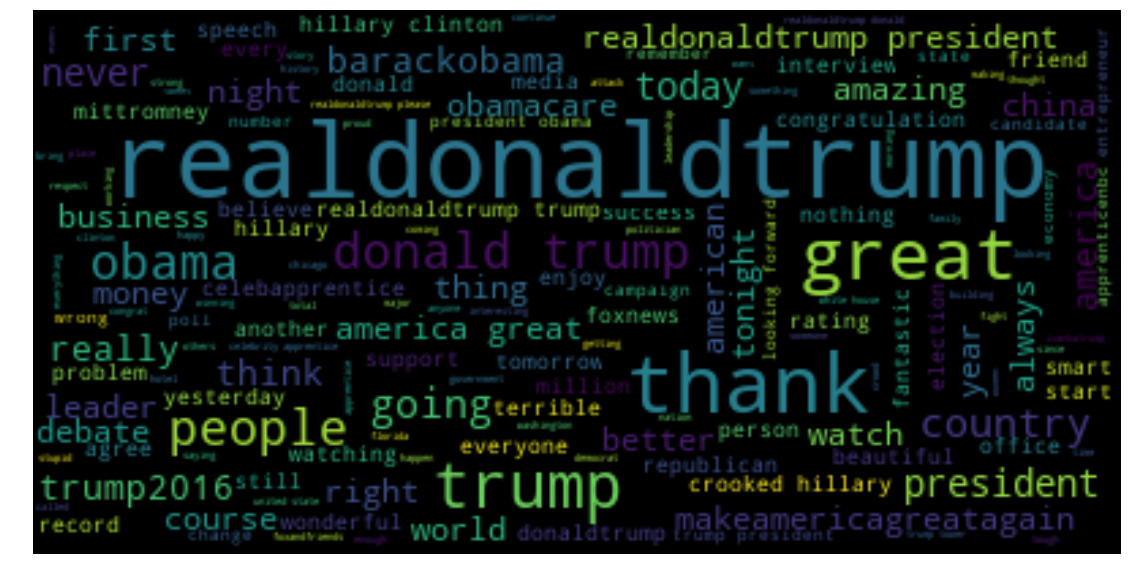

In [34]:
from wordcloud import WordCloud

all_tweets = ' '.join(doc_list)

# Generate a word cloud image
wordcloud = WordCloud().generate(all_tweets)

# Display the generated image:
fig, ax = plt.subplots(figsize=(20, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


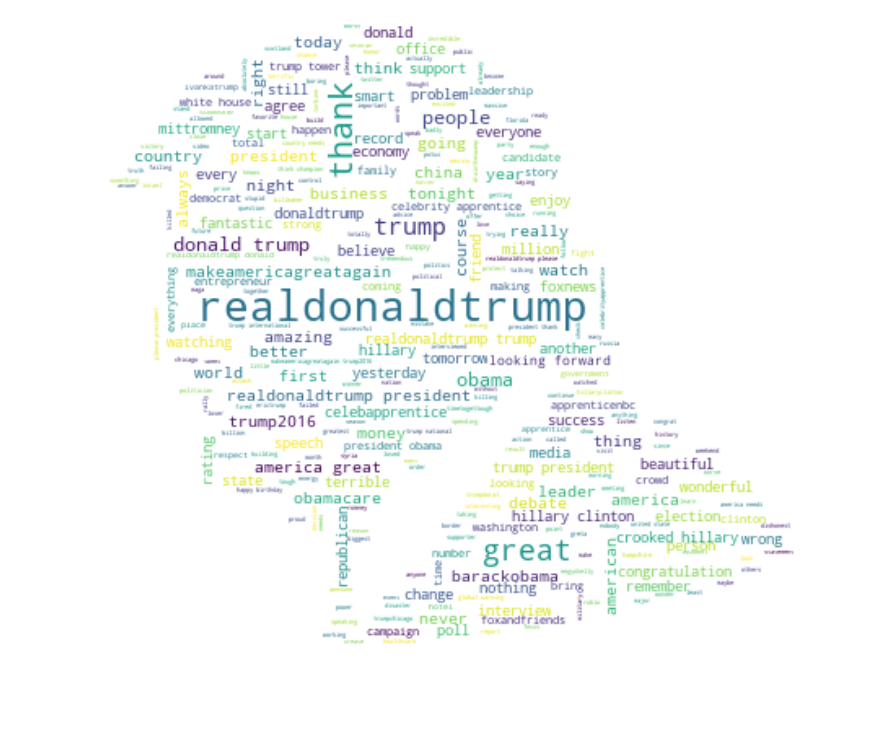

In [35]:
from PIL import Image

trump_mask = np.array(Image.open("data/trump_vector.png"))


wc = WordCloud(background_color="white", max_words=20000, mask=trump_mask)
# generate word cloud
wc.generate(all_tweets)

# store to file
# wc.to_file(path.join(d, "alice.png"))

# show
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()